In [7]:
library("devtools")
install_github("aifimmunology/PALMO")

* checking for file ‘/tmp/RtmpHDm2Bk/remotes4cb7bd44e/aifimmunology-PALMO-a92fdcb/DESCRIPTION’ ... OK
* preparing ‘PALMO’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘PALMO_0.1.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(PALMO)
library(cowplot)

In [ ]:
load("/content/AIFI-scATAC-PBMC-FinalData.Rda")
load("/content/data_Metadata.Rda")

In [ ]:
options(warn=-1)

In [ ]:
datamatrix <- log2(scatac_gm+1)

In [ ]:
palmo_obj <- createPALMOobject(anndata=ann, data=datamatrix)
#Assign Sample, PTID and Time parameters
palmo_obj <- annotateMetadata(data_object=palmo_obj,
sample_column= "Sample", donor_column= "PTID",
time_column= "Time")
#Sample overlap and final matrix
palmo_obj <- mergePALMOdata(data_object=palmo_obj, datatype="singlecell")
#Check for replicates
palmo_obj <- checkReplicates(data_object=palmo_obj, mergeReplicates = T)

Wed Nov  2 18:48:14 2022: The PALMO object is created.

Wed Nov  2 18:48:16 2022: For outout files, the output directory is created.

Wed Nov  2 18:48:16 2022: No Replicates found



Wed Nov  2 23:21:58 2022: Performing Coefficient of variance analysis

Wed Nov  2 23:21:58 2022: Using mean threshold >= 0

Wed Nov  2 23:21:58 2022: Performing CV calculations



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01m 14s


Wed Nov  2 23:23:23 2022: Done. Please check output directory for Plots/results.



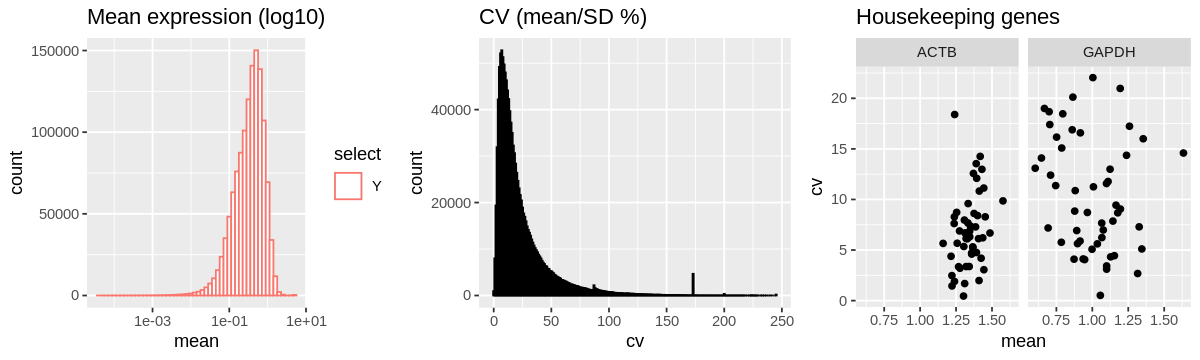

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 3)

palmo_obj <- cvCalcSCProfile(data_object=palmo_obj,
housekeeping_genes=c("GAPDH", "ACTB"),
fileName="scatac")

Wed Nov  2 23:23:30 2022: Performing Coefficient of variance analysis

Wed Nov  2 23:23:30 2022: Performing CV calculations



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01m 11s


Wed Nov  2 23:24:52 2022: Done. Please check output directory for Plots/results.



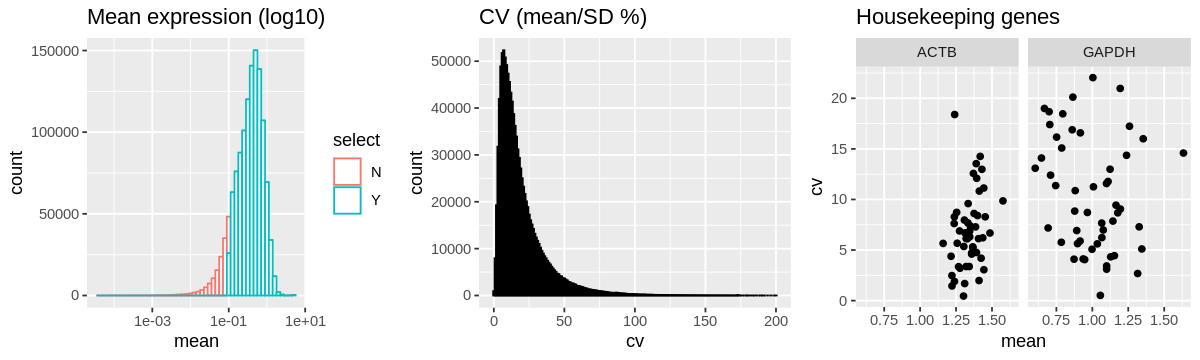

In [ ]:
palmo_obj <- cvCalcSCProfile(data_object=palmo_obj,
housekeeping_genes=c("GAPDH", "ACTB"),
meanThreshold = 0.1,
fileName="scatac")

In [ ]:
cvSCsampleprofile(data_object=palmo_obj, meanThreshold = 0.1,
cvThreshold = 10, fileName="scatac")


Wed Nov  2 18:51:25 2022: Performing Sample-wise Coefficient of variance analysis

Wed Nov  2 18:51:25 2022: Plotting Sample wise CV analysis



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01m 40s


Wed Nov  2 18:53:05 2022: Done. Please check output directory for results.



,Sample,PTID,Time,Sex,Sample_group,group,Sample_group_i
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
PTID2W2:B_intermediate,PTID2W2,PTID2,W2,Male,PTID2W2:B_intermediate,B_intermediate,B_intermediate:PTID2
PTID2W2:B_naive,PTID2W2,PTID2,W2,Male,PTID2W2:B_naive,B_naive,B_naive:PTID2
PTID2W2:CD14_Mono,PTID2W2,PTID2,W2,Male,PTID2W2:CD14_Mono,CD14_Mono,CD14_Mono:PTID2
PTID2W2:CD16_Mono,PTID2W2,PTID2,W2,Male,PTID2W2:CD16_Mono,CD16_Mono,CD16_Mono:PTID2
PTID2W2:CD4_Naive,PTID2W2,PTID2,W2,Male,PTID2W2:CD4_Naive,CD4_Naive,CD4_Naive:PTID2
PTID2W2:CD4_TCM,PTID2W2,PTID2,W2,Male,PTID2W2:CD4_TCM,CD4_TCM,CD4_TCM:PTID2


Wed Nov  2 23:24:52 2022: Performing variance decomposition



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=18m 58s


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



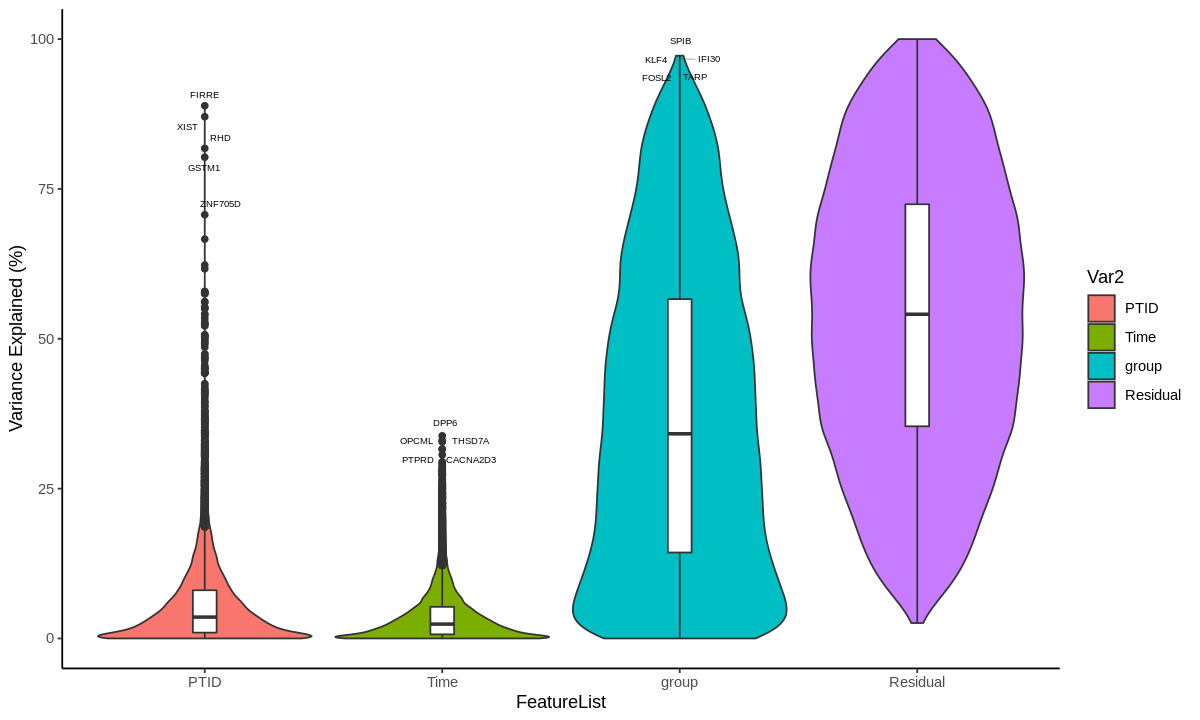

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 6)

#Check the group of interest
head(palmo_obj@curated$anndata)
#Variance decomposition
featureSet <- c("PTID","Time","group")
palmo_obj <- lmeVariance(data_object=palmo_obj,
                          featureSet=featureSet,
                          meanThreshold=0.1, cl = 1,
                          fileName="scatac")
var_decomp <- palmo_obj@result$variance_decomposition

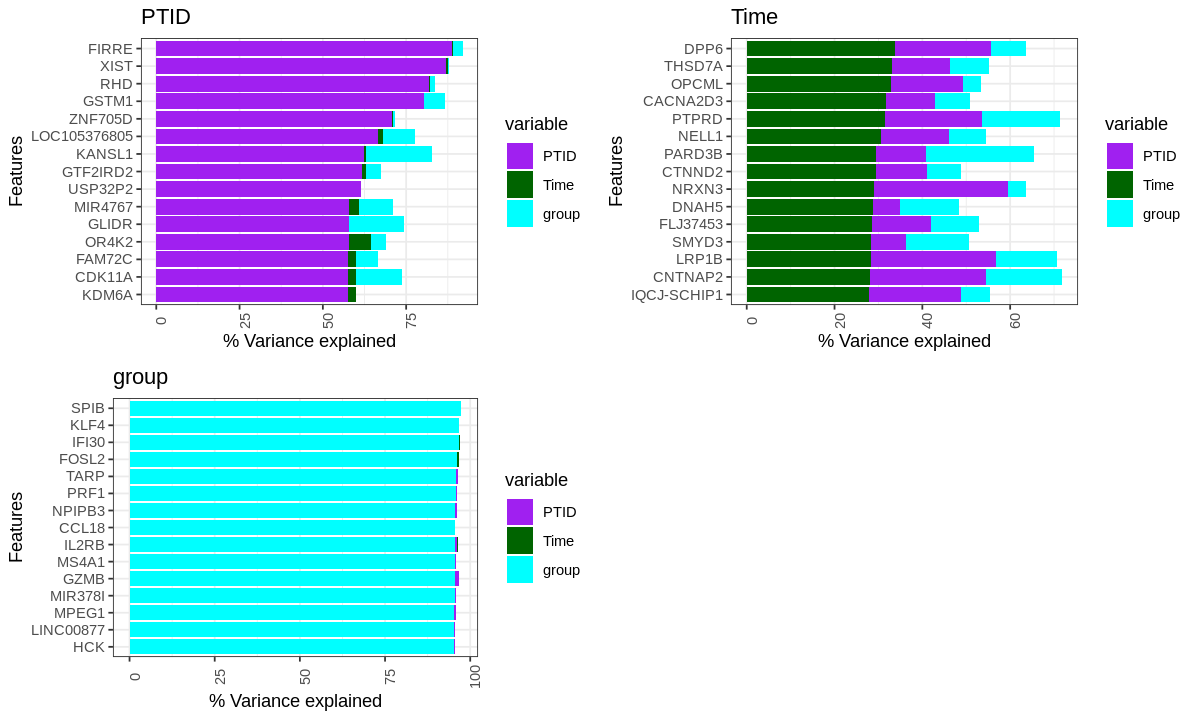

In [ ]:
plots <- variancefeaturePlot(vardata=var_decomp, featureSet=featureSet,
cols=c("purple", "darkgreen", "cyan"))


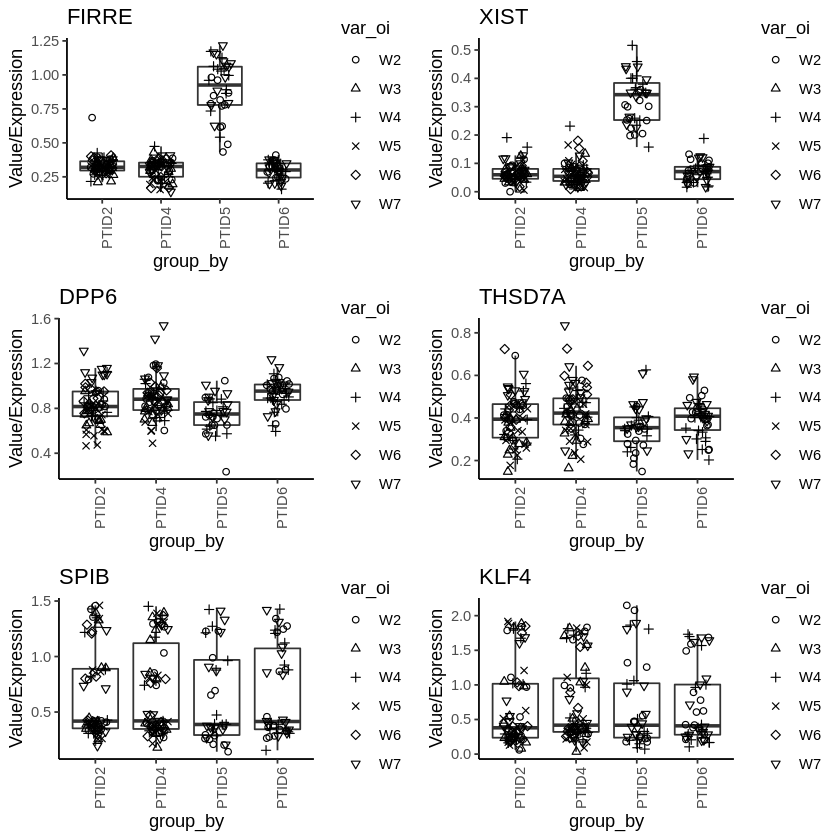

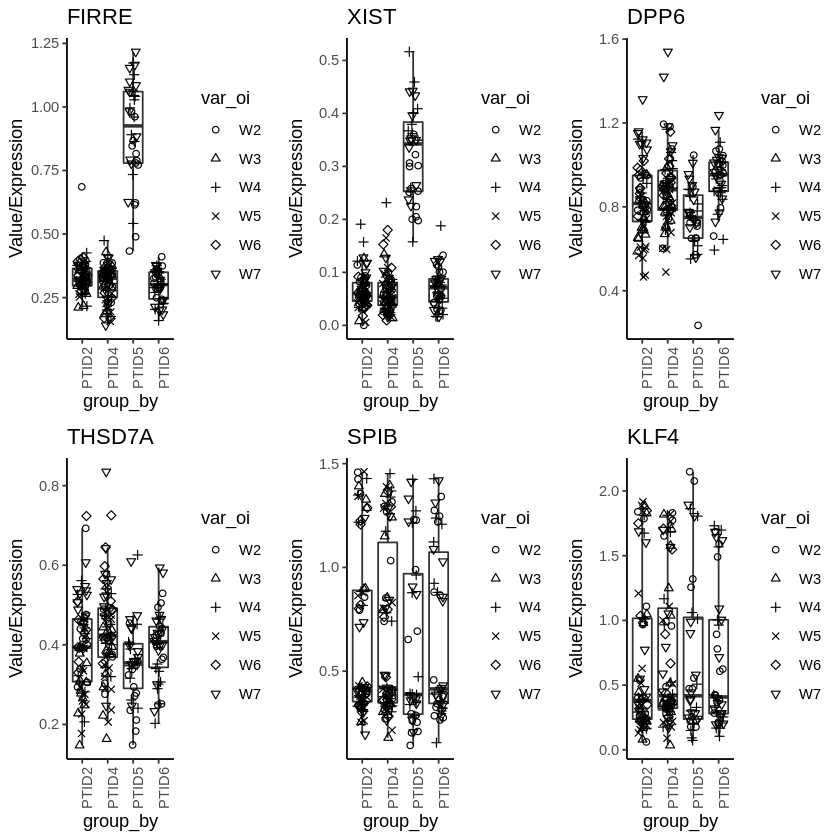

In [ ]:
plots <- gene_featureplot(data_object=palmo_obj,
featureList=c("FIRRE", "XIST",
"DPP6", "THSD7A",
"SPIB", "KLF4"),
x_group_by="PTID", var_oi="Time",
x_text_angle=90)
plot_grid(plotlist=plots, ncol= 3, align="hv")

$SPIB


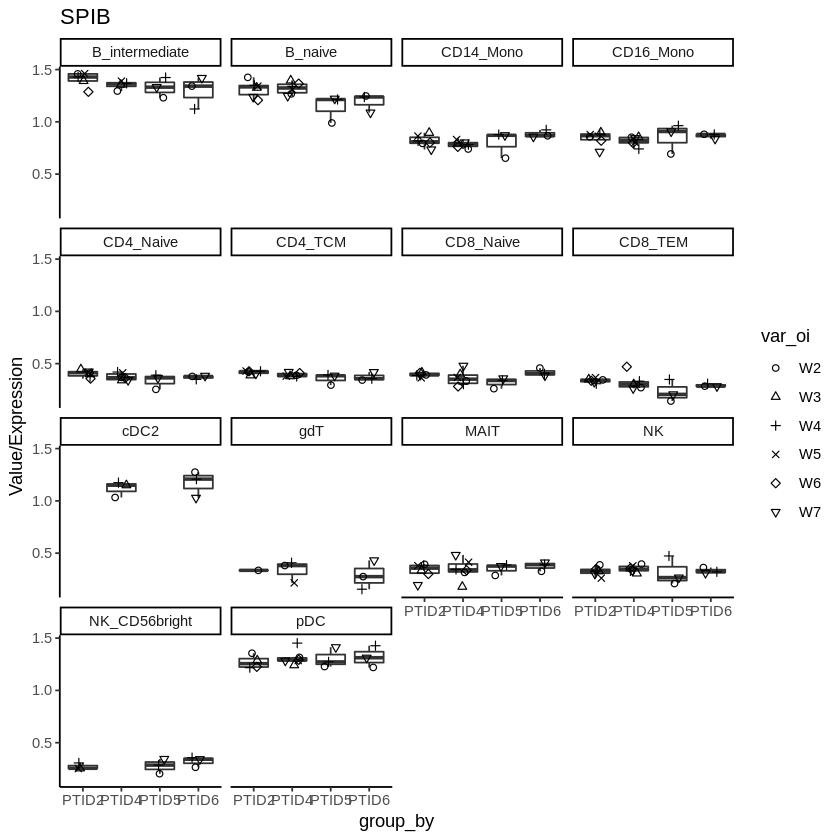

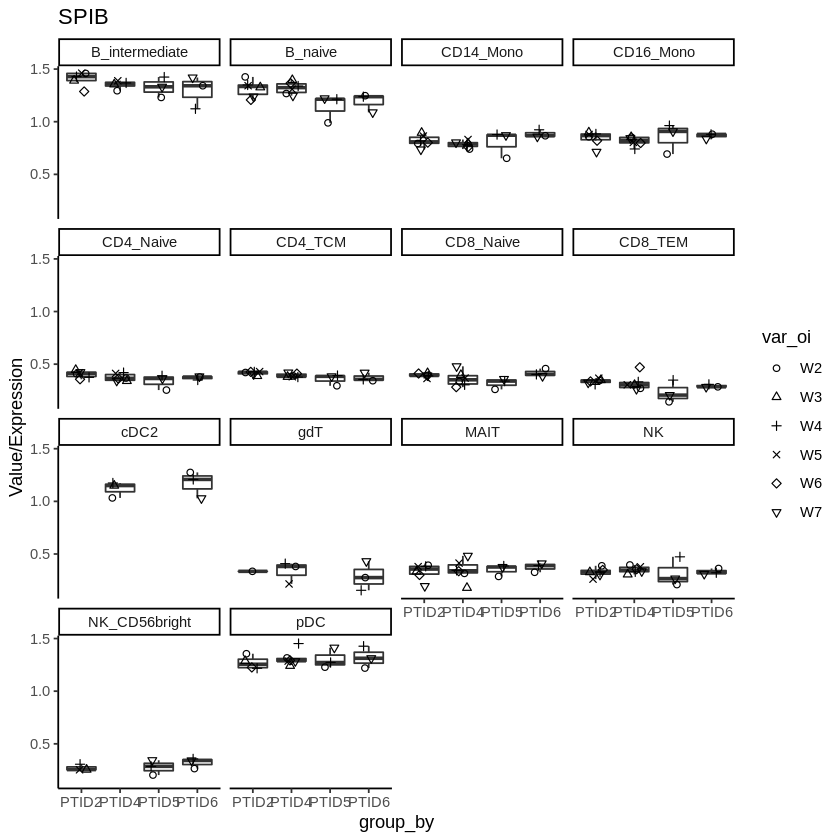

In [ ]:
gene_featureplot(data_object=palmo_obj, featureList="SPIB", facet_by="group")

In [ ]:
palmo_obj <- cvCalcSC(data_object=palmo_obj,
meanThreshold=0.1, cvThreshold=10,
housekeeping_genes=c("GAPDH", "ACTB"),
fileName="scatac")

Wed Nov  2 19:13:13 2022: Performing Coefficient of variance analysis

Wed Nov  2 19:13:13 2022: Performing CV calculations



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01m 22s


Wed Nov  2 19:14:36 2022: Checking Mean Threshold



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01m 13s


Wed Nov  2 19:15:50 2022: Performing Variable gene CV analysis



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01m 15s


Wed Nov  2 19:17:10 2022: Performing Stable gene CV analysis



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01m 10s


Wed Nov  2 19:18:22 2022: Checking Housekeeping-genes CV



  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01m 14s


Wed Nov  2 19:19:40 2022: Saving CV plots in output directory

Wed Nov  2 19:20:23 2022: Done. Please check output directory for results.



Wed Nov  2 19:20:23 2022: Identifying Stable features

Wed Nov  2 19:20:33 2022: Check output directory for results



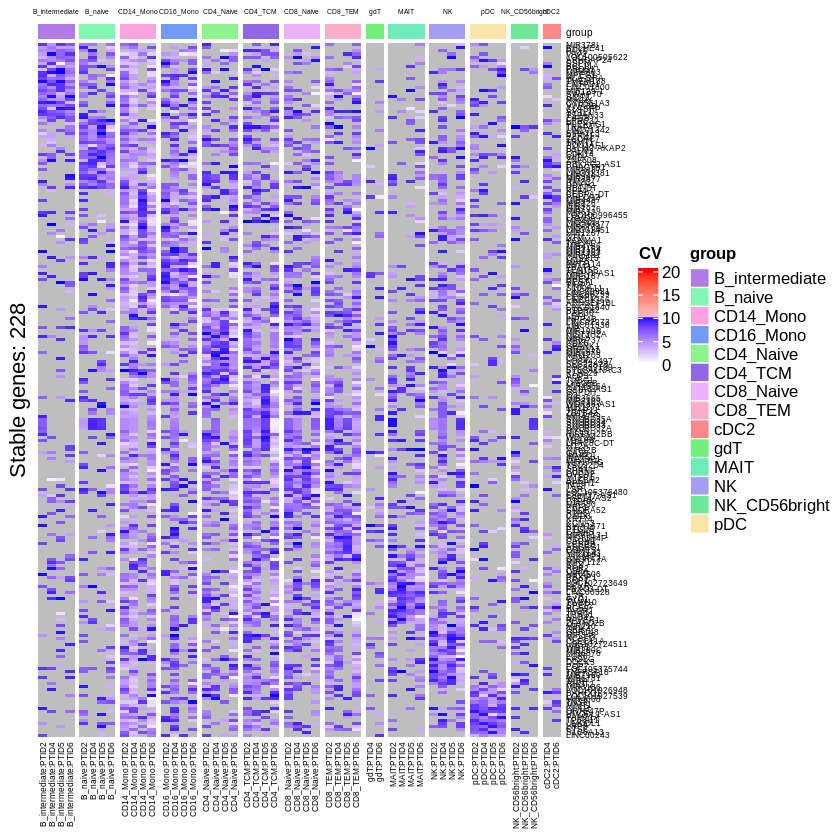

In [ ]:
donorThreshold <- 4
groupThreshold <- 28 #number of donors * number of celltypes/2 (4x14/2)
topFeatures <- 25
palmo_obj <- StableFeatures(data_object=palmo_obj,
cvThreshold=10,
donorThreshold=4, groupThreshold=28,
topFeatures=25,
fileName="scatac")
stable_gene <- palmo_obj@result$stable_genes

Wed Nov  2 19:20:34 2022: Identifying Variable features

Wed Nov  2 19:20:40 2022: Check output directory for results



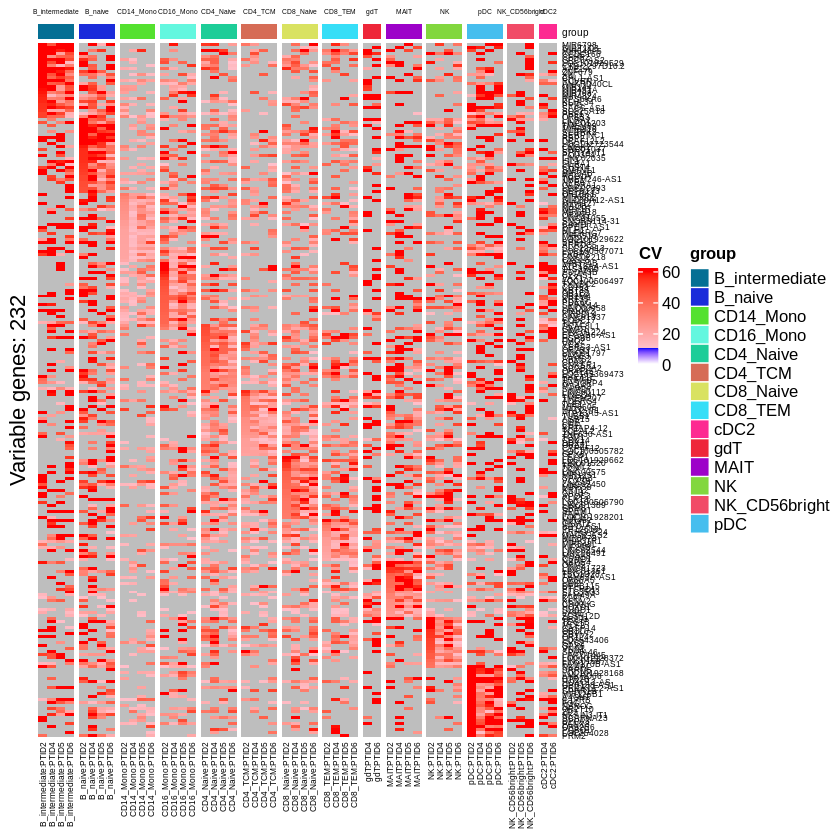

In [ ]:
palmo_obj <- VarFeatures(data_object=palmo_obj,
cvThreshold=10,
donorThreshold=4, groupThreshold=28,
topFeatures=25,
fileName="scatac")
var_gene <- palmo_obj@result$var_genes

Note: 8 points are out of plotting region in sector 'pDC', track '2'.



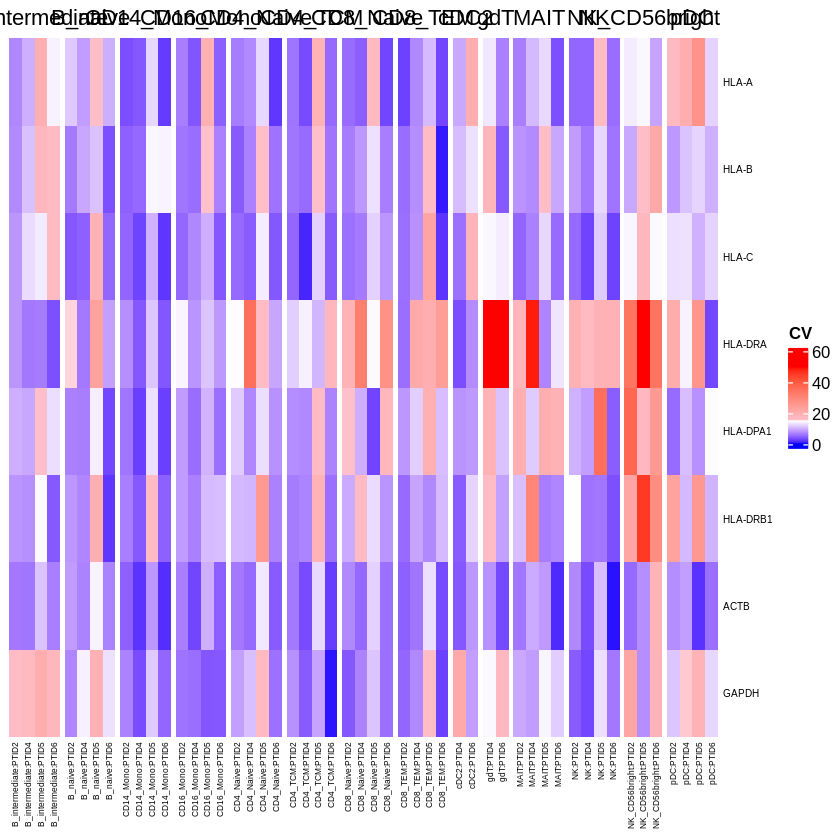

Note: 8 points are out of plotting region in sector 'pDC', track '2'.



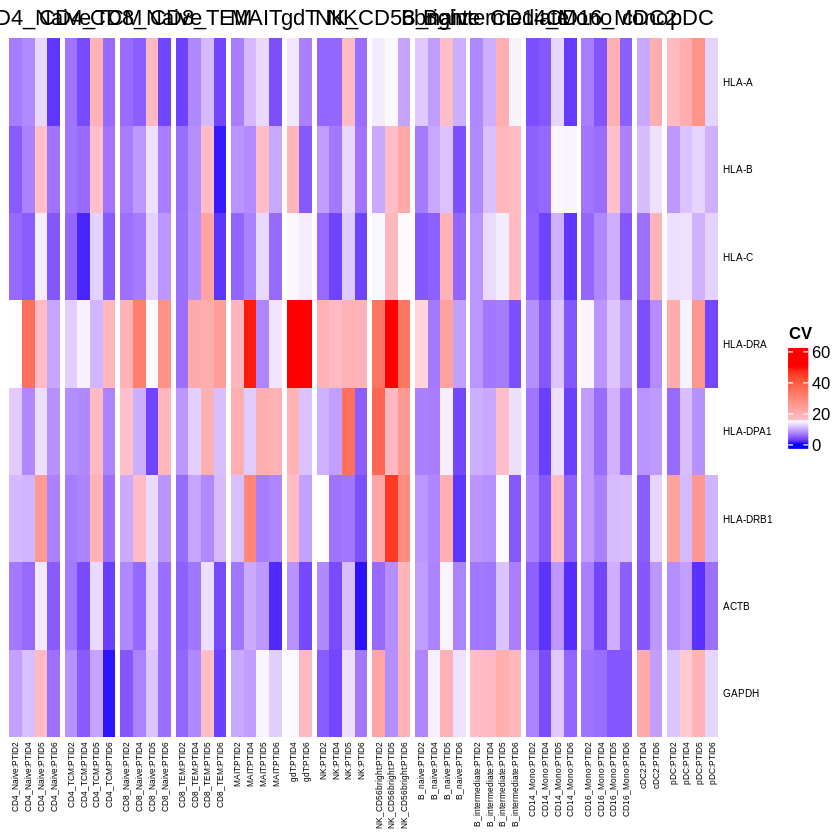

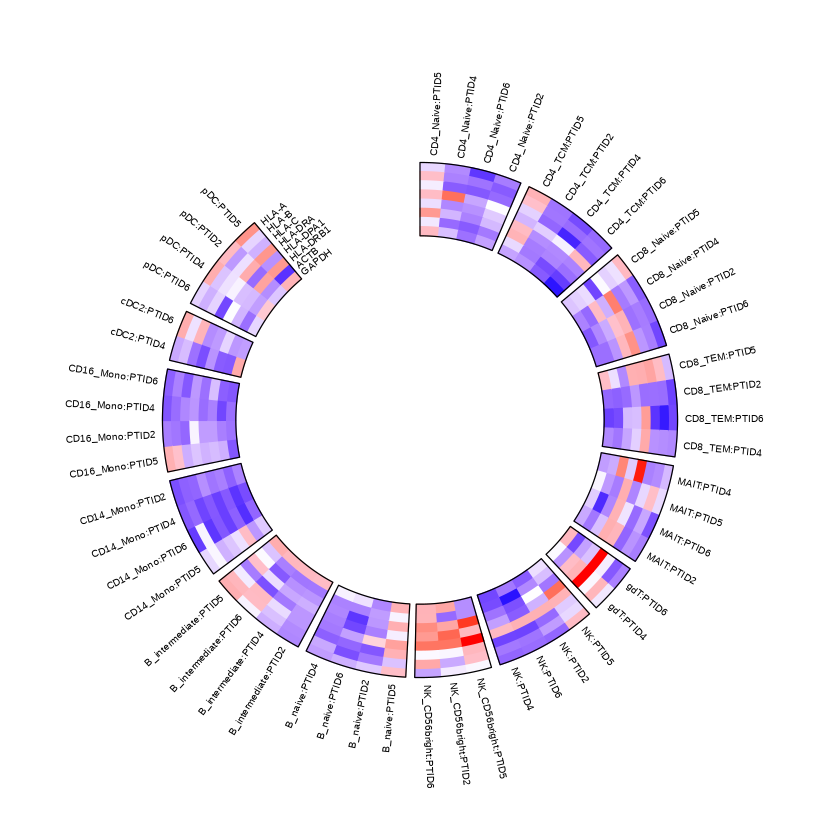

In [ ]:
geneList <- c("HLA-A","HLA-B","HLA-C","HLA-DRA","HLA-DPA1","HLA-DRB1",
"ACTB","GAPDH")
plotmatrix <- genecircosPlot(data_object=palmo_obj, geneList=geneList,
colorThreshold=15)
#order by user-defined group order
celltype_oi <- c("CD4_Naive","CD4_TEM","CD4_TCM","CD4_CTL",
"CD8_Naive","CD8_TEM","CD8_TCM","Treg","MAIT","gdT",
"NK", "NK_CD56bright",
"B_naive","B_memory", "B_intermediate",
"CD14_Mono","CD16_Mono",
"cDC2","pDC")
plotmatrix <- genecircosPlot(data_object=palmo_obj, geneList=geneList,
group_oi=celltype_oi, colorThreshold=15)

In [5]:
getOption("Ncpus", 2L)

[1] 2

In [6]:
parallel::detectCores()

[1] 2

**Test GEO Downloading From our cell hashing paper**

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("GEOquery")

In [ ]:
library(GEOquery)
options(timeout = max(1800, getOption("timeout")))
options(download.file.method.GEOquery = "wget")
gse <- getGEOSuppFiles("GSE181862")

In [ ]:
system("mkdir data")
system("tar -xvf GSE181862/GSE181862_RAW.tar -C data/.")